<font color=green> Привет еще раз. Спасибо, что доделал работу. Мои комментарии к исправленным замечаниям будут выделены зеленым цветом. Нейтральные комментарии обозначу <font color=orange>оранжевым цветом</font>. Если же потребуется доработка некоторых пунктов проекта, то я отмечу это <font color=red>красным цветом. 
    
---

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Привет! Спасибо, что прислал задание:) Меня зовут Слепцов Артем и я буду проверять твой проект) Ты проделал большую работу над проектом, однако его еще можно улучшить. 

Мои комментарии обозначены пометкой **Комментарий наставника**. Далее в файле ты сможешь найти их в похожих ячейках (если фон комментария <font color=green>зелёный</font> - всё сделано правильно; <font color=orange>оранжевый</font> - есть замечания, но не критично; <font color=red>красный</font> - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения данного проекта. 

</div>

<font color=blue>
Провел исправления. Под каждым красным комментарием добавил синий, которой объясняет, какие изменения были проведены.

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Описание данных**
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

***Пояснение:***
апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Вступление в работу - очень важно. Так ты поясняешь то, чему она посвящена. Можно также привести краткий план проведения самой работы. 

</div>

### Шаг 1. Открытие файла с данными и изучение общей информации

In [56]:
# подключим библиотеки Pandas и matpolotlib
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
# прочитаем данные из файла
input_data = pd.read_csv('/datasets/real_estate_data.csv')

# и проверим чтение из файла
input_data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Ага, наш файл имеет разделители столбцов вида "\t", значит надо учесть это при считывании.

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Неудачные попытки считывания данный лучге не оставлять в проекте. Они не несут в себе полезной для анализа информации.  

</div>

In [58]:
# прочитаем данные из файла еще раз, с учетом разделителя столбцов
input_data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t', decimal=',')

# и проверим чтение из файла
input_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Так намного лучше. В нашем файле 22 колонки, посмотрим, нет ли каких сюрпризов в записи их названий

In [59]:
# выведем название колонок
input_data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Для соответствия общему стандарту названия колонок, переименуем 'cityCenters_nearest' в 'city_centers_nearest', а 'parks_around3000' и 'ponds_around3000' в 'parks_around_3000' и 'ponds_around_3000'соответственно

In [60]:
input_data.rename(columns={'cityCenters_nearest':'city_centers_nearest', 
                           'parks_around3000':'parks_around_3000',
                           'ponds_around3000':'ponds_around_3000'
                          },
                           inplace=True
                          )

# и проверим результат
input_data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Теперь можно переходить к самим данным. Сколько их всего? Нужно ли изменить где тип данных? Сколько всего пропусков?

In [61]:
# посмотрим на информацию о данных
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null object
total_area              23699 non-null object
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null object
floors_total            23613 non-null object
living_area             21796 non-null object
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null object
balcony                 12180 non-null object
locality_name           23650 non-null object
airports_nearest        18157 non-null object
city_centers_nearest    18180 non-null object
parks_around_3000       18181 non-null object
parks_nearest           8079 non-null object
ponds_around_3000       18

- last_price (цена на момент снятия с публикации) — поскольку цена квартиры редко считается с копейками, то в угоду памяти, преобразуем в int
- total_area (площадь квартиры в квадратных метрах (м²)) — может быть не круглой и является важной характеристикой, поэтому преобразуем в float

- first_day_exposition (дата публикации) — преобразуем в дату

- ceiling_height (высота потолков (м)) - может быть не круглой и является важной характеристикой, поэтому преобразуем в float
- floors_total (всего этажей в доме) — не может быть не круглой, поэтому преобразуем в int
- living_area (жилая площадь в квадратных метрах(м²)) — может быть не круглой, преобразуем в float
- is_apartment (апартаменты (булев тип)) — приведем к булевоему типу, как указанно в описании данных
- kitchen_area (площадь кухни в квадратных метрах (м²)) — может быть не круглой и является важной характеристикой, поэтому преобразуем в float
- balcony (число балконов) — не может быть не круглым, преобразуем в int

- locality_name (название населённого пункта) - проверим на одинаковое написание одних и тех же названий, если нужно приведем к единому виду

- airports_nearest (расстояние до ближайшего аэропорта в метрах (м)) — вряд-ли кому-то интересно расстояние с точностью до сантиметра, поэтому в угоду использования памяти преобразуем в int
- city_centers_nearest (расстояние до центра города (м)) — вряд-ли кому-то интересно расстояние с точностью до сантиметра, поэтому в угоду использования памяти преобразуем в int
- parks_around_3000 (число парков в радиусе 3 км) — не може быть некруглым, приведем к int
- parks_nearest (расстояние до ближайшего парка (м)) - вряд-ли кому-то интересно расстояние с точностью до сантиметра, поэтому в угоду использования памяти преобразуем в int
- ponds_around_3000 (число водоёмов в радиусе 3 км) — не може быть некруглым, приведем к int
- ponds_nearest (расстояние до ближайшего водоёма (м)) - вряд-ли кому-то интересно расстояние с точностью до сантиметра, поэтому в угоду использования памяти преобразуем в int
- days_exposition (сколько дней было размещено объявление (от публикации до снятия)) — не может быть не круглым, для оптимизации используемой памяти преобразуем в int

Поскольку в данных явно есть пропущенные значения, то при преобразовании будем пользоваться методом .to_numeric() с параметром errors='coerce'

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Следует давать переменным осознанные имена. Таблица про квартиры - название надо бы выбрать соответствующее.

Первый взгляд на таблицу выполнен. С типом данных ты разобрался. Описание каждого столбца довольно подробное. Но также у нас есть довольно большое число пропусков в данных. Важно понять причину их появления в данных, также можно предложить возможные варианты их обработки. 

</div>

In [62]:
# Для начала посмотрим количество пропущенных данных, чтоб после преобразования осталось примерно такое же
input_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [63]:

# Преобразуем все из списка, кроме  first_day_exposition и locality_name. Их будем преобразовывать отдельно
input_data['last_price'] = pd.to_numeric(input_data['last_price'],errors='coerce')
input_data['last_price'] = input_data['last_price'].astype('int')

input_data['total_area'] = pd.to_numeric(input_data['total_area'],errors='coerce')
input_data['total_area'] = input_data['total_area'].astype('float')

input_data['ceiling_height'] = pd.to_numeric(input_data['ceiling_height'],errors='coerce')
input_data['ceiling_height'] = input_data['ceiling_height'].astype('float')

input_data['living_area'] = pd.to_numeric(input_data['living_area'],errors='coerce')
input_data['living_area'] = input_data['living_area'].astype('float')

input_data['is_apartment'] = pd.to_numeric(input_data['is_apartment'],errors='coerce')
input_data['is_apartment'] = input_data['is_apartment'].astype('bool')

input_data['kitchen_area'] = pd.to_numeric(input_data['kitchen_area'],errors='coerce')
input_data['kitchen_area'] = input_data['kitchen_area'].astype('float')


#преобразования по которым были возвращены ошибки

# ValueError: Cannot convert non-finite values (NA or inf) to integer
#input_data['floors_total'] = pd.to_numeric(input_data['floors_total'],errors='coerce')
#input_data['floors_total'] = input_data['floors_total'].astype('int')

# ValueError: Cannot convert non-finite values (NA or inf) to integer
#input_data['balcony'] = pd.to_numeric(input_data['balcony'],errors='coerce')
#input_data['balcony'] = input_data['balcony'].astype('int')

# ValueError: Cannot convert non-finite values (NA or inf) to integer
#input_data['airports_nearest'] = pd.to_numeric(input_data['airports_nearest'],errors='coerce')
#input_data['airports_nearest'] = input_data['airports_nearest'].astype('int')

# ValueError: Cannot convert non-finite values (NA or inf) to integer
#input_data['city_centers_nearest'] = pd.to_numeric(input_data['city_centers_nearest'],errors='coerce')
#input_data['city_centers_nearest'] = input_data['city_centers_nearest'].astype('int')

# ValueError: Cannot convert non-finite values (NA or inf) to integer
#input_data['parks_around_3000'] = pd.to_numeric(input_data['parks_around_3000'],errors='coerce')
#input_data['parks_around_3000'] = input_data['parks_around_3000'].astype('int')

# ValueError: Cannot convert non-finite values (NA or inf) to integer
#input_data['parks_nearest'] = pd.to_numeric(input_data['parks_nearest'],errors='coerce')
#input_data['parks_nearest'] = input_data['parks_nearest'].astype('int')

# ValueError: Cannot convert non-finite values (NA or inf) to integer
#input_data['ponds_around_3000'] = pd.to_numeric(input_data['ponds_around_3000'],errors='coerce')
#input_data['ponds_around_3000'] = input_data['ponds_around_3000'].astype('int')

# ValueError: Cannot convert non-finite values (NA or inf) to integer
#input_data['ponds_nearest'] = pd.to_numeric(input_data['ponds_nearest'],errors='coerce')
#input_data['ponds_nearest'] = input_data['ponds_nearest'].astype('int')

#ValueError: Cannot convert non-finite values (NA or inf) to integer
#input_data['days_exposition'] = pd.to_numeric(input_data['days_exposition'],errors='coerce')
#input_data['days_exposition'] = input_data['days_exposition'].astype('int')

# и проверим преобразования
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null object
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null object
locality_name           23650 non-null object
airports_nearest        18157 non-null object
city_centers_nearest    18180 non-null object
parks_around_3000       18181 non-null object
parks_nearest           8079 non-null object
ponds_around_3000       

Не густо, без ошибок прямое преобразование удалось не для всех столбцов. Проверим не потеряли ли мы данные. В произведенных преобразованиях должно остаться столько же пропусков.

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Преобразование типов стоит делать после заполнения пропусков. Иногда тип может меняться автоматически из-за того, что ты проводишь операции над данным столбцом. Также у тебя возникали ошибки с изменением типа данных на целочисленный. В решении это тебе поможет эта [ссылка](https://pandas.pydata.org/docs/user_guide/integer_na.html). Также смысла в применении методом to_numeric и astype подряд нет. Разберись с тем, что делает каждый из данных методов. Об этом можно узнать в документации методов. 

</div>

In [64]:
input_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Ну, по крайней мере, мы не сделали хуже и не потеряли данные при преобразовании типов.
Будем разбираться со столбцами, где преобразование не было выполнено. Сначала посмотрим, какие есть уникальные значения? Возможно данные подгружались из другой базы, с другими стандартами описания и пропущенные значения заполнялись каким-то маркером? Проверим на примере floors_total

In [65]:
input_data['floors_total'].unique()

array(['16.0', '11.0', '5.0', '14.0', '12.0', '26.0', '24.0', '27.0',
       '9.0', '6.0', '17.0', '25.0', '3.0', '23.0', '19.0', '18.0', '4.0',
       '22.0', '8.0', '2.0', '10.0', '7.0', '13.0', '15.0', nan, '20.0',
       '28.0', '36.0', '21.0', '35.0', '34.0', '60.0', '1.0', '29.0',
       '33.0', '52.0', '37.0'], dtype=object)

Ага, есть уникальное значение nan записанное как текст. Поскольку ошибка одинакова, во всех столбцах, то скорее всего она именно в том, что 
пустые значения помечены строкой 'nan'. Тогда преобразование через .to_numeric() с параметром errors='coerce' должно проходить, а преобразование из получившегося числового типа в тип int - не должно. Проверим, происходил ли преобразование в число.

In [66]:
print('тип столбца до преобразования:',input_data['floors_total'].dtypes)

input_data['floors_total'] = pd.to_numeric(input_data['floors_total'],errors='coerce')

print('тип столбца после преобразования:',input_data['floors_total'].dtypes)

тип столбца до преобразования: object
тип столбца после преобразования: float64


Отлично, возможно вот она, общая ошибка. Попробуем преобразовать все проблемные столбцы в числовые форматы, затем заменим строковое значение 'nan' на пустую строку. В конце проверим, не потеряли ли мы данные. 

In [67]:
# Преобразуем в число
input_data['balcony'] = pd.to_numeric(input_data['balcony'],errors='coerce')
input_data['airports_nearest'] = pd.to_numeric(input_data['airports_nearest'],errors='coerce')
input_data['city_centers_nearest'] = pd.to_numeric(input_data['city_centers_nearest'],errors='coerce')
input_data['parks_around_3000'] = pd.to_numeric(input_data['parks_around_3000'],errors='coerce')
input_data['parks_nearest'] = pd.to_numeric(input_data['parks_nearest'],errors='coerce')
input_data['ponds_around_3000'] = pd.to_numeric(input_data['ponds_around_3000'],errors='coerce')
input_data['ponds_nearest'] = pd.to_numeric(input_data['ponds_nearest'],errors='coerce')
input_data['days_exposition'] = pd.to_numeric(input_data['days_exposition'],errors='coerce')

# заменим строковое значение nan на пустую строку

input_data['floors_total'] = input_data['floors_total'].replace(to_replace='nan', value='')
input_data['airports_nearest'] = input_data['airports_nearest'].replace(to_replace='nan', value='')
input_data['city_centers_nearest'] = input_data['city_centers_nearest'].replace(to_replace='nan', value='')
input_data['parks_around_3000'] = input_data['parks_around_3000'].replace(to_replace='nan', value='')
input_data['parks_nearest'] = input_data['parks_nearest'].replace(to_replace='nan', value='')
input_data['ponds_around_3000'] = input_data['ponds_around_3000'].replace(to_replace='nan', value='')
input_data['ponds_nearest'] = input_data['ponds_nearest'].replace(to_replace='nan', value='')
input_data['days_exposition'] = input_data['days_exposition'].replace(to_replace='nan', value='')


# посчитаем количество пропущенных данных
input_data.isna().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Преобразование типов, опять же, лучше переместить в конец раздела. 

</div>

Мы не потеряли никаких данных, преобразовали их в числовые форматы, но не смогли оптимизировать потребление памяти, потому что не смогли преобразовать пропущенные значения. 

От некоторых пропущенных значений можно избавиться логическими рассуждениями. Так, например, пропуск в столбце balcony вполне может означать отсутствие балкона и его логично заменить на 0. 

Аналогично с пропусками в столбцах parks_around_3000, ponds_around_3000. 

А вот пропуски в столбце days_exposition вполне могут означать, что квартира еще находится в продаже, равно как и пропуски в floors_total, ceiling_height могут значить, что дом еще не достроен и квартира продается от застройщика, например, на стадии котлована. Пропуски в столбцах living_area и kitchen_area, в отличие от balcony, тоже могут означать, что строительство еще в процессе, потому как количество балконов и в какой именно квартире будет, а в какой не будет балкона, решается на стадии проектирования, а вот конечная площадь помещений может изменяться в зависимости от того, как будут поставлены межкомнатные стены.

Таким образом: заменим пропущенные данные в столбцах balcony, parks_around_3000, ponds_around_3000 на нули и преобразуем эти столбцы в тип int, для экономия памяти.  В остальных столбцах пока никаких замен производить не будем.

In [68]:
input_data['balcony']=input_data['balcony'].fillna(0)
input_data['parks_around_3000']=input_data['parks_around_3000'].fillna(0)
input_data['ponds_around_3000']=input_data['ponds_around_3000'].fillna(0)

input_data['balcony']=input_data['balcony'].astype('int')
input_data['parks_around_3000']=input_data['parks_around_3000'].astype('int')
input_data['ponds_around_3000']=input_data['ponds_around_3000'].astype('int')

# посчитаем количество пропущенных данных
input_data.isna().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000           0
parks_nearest           15620
ponds_around_3000           0
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Интересные гипотезы о причинах появления пропусков. Возможно, так и есть. 

</div>

Обратимся к тексту ТЗ проекта и посмотрим, все ли данные из входных нам нужны. Задачи по ТЗ следующие:

1) "Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.". Тут намнужны такие столбцы как: living_area, kitchen_area, total_area, last_price, rooms, ceiling_height

2) 'Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?". Тут мы будем работать с датой продажи квартиры days_exposition.

3) Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

4) "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года." Тут, помимо столбцов используемых в 1 и 2 пунктах, так же нужны столбцы city_centers_nearest, floor, floors_total и first_day_exposition

5) "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'". Никаких доп.столбцов, кроме перечисленных ранее, нам не понадобится

6) "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона". Никаких доп.столбцов, кроме перечисленных ранее, нам не понадобится

7) "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?". Никаких доп.столбцов, кроме перечисленных ранее, нам не понадобится


Таким образом, следующие столбцы исходных данных нам не очень то и важны, поэтому, опять же в угоду памяти и скорости обрабоки, можем их смело удалить (тем более, что во входных данных они у нас есть, и при необходимости мы можем к ним обратиться):
- total_images
- is_appartment
- open_plan
- studio
- airports_nearest
- city_centers_nearest
- parks_around_3000
- parks_nearest 
- ponds_around_3000     
- ponds_nearest    

Безусловно, отказ от части данных снижает качество аналитической работы, ведь на стоимость квартиры влияет много факторов. Но в рамках учебного проекта не будет так глубоко погружаться в работу аналитика отдельного проекта, который занимается анализом каждый день и получает за эту работу неплохие деньги. Наша цель - научиться работать, изучить инструмент и принципы, поэтому мы сознательно идем на ухудшение итоговых данных, чтобы выдержать сроки сдачи проекта. В дальнейшем всегда можно будет вернуться и попытаться уточнить полученые результаты.

In [69]:
# скопируем dataframe в новую переменную
data = input_data.copy()

# удалим обозначенные выше столбцы.

def del_columns(name):
    data.drop(name, axis=1, inplace=True)
    
cols_for_removing = ['is_apartment','total_images',
                     'open_plan', 'airports_nearest', 
                     'parks_around_3000','parks_nearest', 'ponds_around_3000',
                     'ponds_nearest','studio']

for col in cols_for_removing:
    del_columns(col)

    
    
# не забываем преобразовать дату в дату
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

data.info()
data.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 13 columns):
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
city_centers_nearest    18180 non-null float64
days_exposition         20518 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(4), object(1)
memory usage: 2.4+ MB


,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,city_centers_nearest,days_exposition
0,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,25.0,0,Санкт-Петербург,16028.0,NaN
1,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,11.0,2,посёлок Шушары,18603.0,81.0
2,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,8.3,0,Санкт-Петербург,13933.0,558.0
3,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,0,Санкт-Петербург,6800.0,424.0
4,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,41.0,0,Санкт-Петербург,8098.0,121.0


### Вывод

Импортировали данные, привели к ожидаемым типам данных. Выявили какие данные нам точно понадобятся и создали новый датафрейм, с которым будем работать. Мы не теряем никакие данные, потому что они хранятся в переменной input_data, а если нам друг понадобятся учесть при анализе какие-либо из удаленных столбцов, то мы всегда можем просто удалить столбец из списка cols_for_removing и перезапустить проект. Кроме того, мы сразу же частично избавились от пропусков данных, заполнив их нулями, там где это уместно.

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Да, для анализа нам все колонки не понадобятся. Поэтому их можно вынести в отдельную таблицу, а работать уже с теми данными, которые нам нужны. 

</div>

### Шаг 2. Предобработка данных

In [70]:
# проверим дубли 
data.duplicated().sum()

0

Отлично, у нас нет дублированных строк. Поскольку все численные данные у нас по логике должны быть не отрицательные, то проверим, нет ли в данных артефактов.

In [71]:
print("Кол-во данных по условию last_price <0:",data[data['last_price']<0]['last_price'].count())

print("Кол-во данных по условию total_area <0:",data[data['total_area']<0]['total_area'].count())

print("Кол-во данных по условию rooms <0:",data[data['rooms']<0]['rooms'].count())

print("Кол-во данных по условию ceiling_height <0:",data[data['ceiling_height']<0]['ceiling_height'].count())

print("Кол-во данных по условию floors_total <0:",data[data['floors_total']<0]['floors_total'].count())

print("Кол-во данных по условию living_area <0:",data[data['living_area']<0]['living_area'].count())

print("Кол-во данных по условию floor <0:",data[data['floor']<0]['floor'].count())

print("Кол-во данных по условию kitchen_area <0:",data[data['kitchen_area']<0]['kitchen_area'].count())

print("Кол-во данных по условию balcony <0:",data[data['balcony']<0]['balcony'].count())

print("Кол-во данных по условию city_centers_nearest <0:",data[data['city_centers_nearest']<0]['city_centers_nearest'].count())

print("Кол-во данных по условию days_exposition <0:",data[data['days_exposition']<0]['days_exposition'].count())


Кол-во данных по условию last_price <0: 0
Кол-во данных по условию total_area <0: 0
Кол-во данных по условию rooms <0: 0
Кол-во данных по условию ceiling_height <0: 0
Кол-во данных по условию floors_total <0: 0
Кол-во данных по условию living_area <0: 0
Кол-во данных по условию floor <0: 0
Кол-во данных по условию kitchen_area <0: 0
Кол-во данных по условию balcony <0: 0
Кол-во данных по условию city_centers_nearest <0: 0
Кол-во данных по условию days_exposition <0: 0


Отлично, отрицательных значений среди чисел у нас нет. А что на счет записи населенного пункта? Нет ли там не явных дублей, когда одно и то же место записано по разному.

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Стоит автоматизировать процесс. Подумай, как это можно сделать. Желательно, не через цикл. 

</div>

In [72]:
data['locality_name'].unique()


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Судя по всему есть неявные дубли, например 'Кудрово' и 'деревня Кудрово'. Можно упорно разбиваться данные на группы по типу населенного пункта, при этом объеденяя разные написания в одно (например: "городской поселок" и "поселок городского типа"), но в рамках задач нам нет необходимости знать тип населенного пункта, поэтому получим список названий с помощью лемматизации и сделаем дополнительный столбец данных с названием населенного пункта в общем формате.

In [73]:
# соберем все уникальные написания навеленных пунктов в единый текст
text = ''
for name in data['locality_name'].unique():
    text = text+str(name)+', '


# лемматизируем текст
from pymystem3 import Mystem
m = Mystem()

lemmas = m.lemmatize(text)

#посмотрим уникальные леммы и посчитаем их количество
from collections import Counter
Counter(lemmas)

Counter({'санкт-петербург': 1,
         ', ': 364,
         'поселок': 201,
         ' ': 484,
         'шушар': 1,
         'городской': 53,
         'янино': 2,
         '-': 12,
         '1': 2,
         'парголовый': 1,
         'муриный': 3,
         'ломоносов': 1,
         'сертолово': 1,
         'петергоф': 1,
         'пушкин': 1,
         'деревня': 106,
         'кудрово': 2,
         'коммунар': 2,
         'колпино': 1,
         'тип': 39,
         'красный': 5,
         'бор': 8,
         'гатчина': 1,
         'федоровский': 2,
         'выборг': 1,
         'кронштадт': 1,
         'кировск': 1,
         'новый': 6,
         'девяткино': 1,
         'металлострой': 1,
         'лебяжий': 2,
         'сиверский': 1,
         'молодцов': 1,
         'кузьмоловский': 2,
         'садовый': 4,
         'товарищество': 5,
         'ропша': 2,
         'павловск': 1,
         'пикколово': 1,
         'всеволожск': 1,
         'волхов': 1,
         'кингисепп': 1,
         'п

Как видим, лемматизация не сильно нам поможет. Потому что, например, по лемме ‘большой’ есть поселок ‘Большой Сабск’ и ‘Большая Пустомержа‘, ‘Большая Ижора‘, ‘Большое Рейзино‘.  Кроме того, в этом подходе ‘Янино-1’ разбивается на  3 леммы: ‘Янино‘, ‘-’ и ‘1’.
Попробуем вытаскивать из text подстроки, начинающиесяслова с заглавных букв на первом месте и оканчивающиеся запятой. Google нам в помощь!

***N.B.:*** получилось! Может и костыль, но работает! ЕХУ!

In [74]:
import re

splited_text = []
list_of_locations = []
#разделим текст на населенные пункты
splited_text=re.split(r', *',text)

# поскольку все названия населенных пунтков начинаются с заглавной буквы, то можем регулярным выражением их найти.
# при составлении регулярки следует учитывать, что у нас есть "ё" в названии "Фёдоровское", а так же есть дефисы и числа (Янино-1)
# сразу будем объединять элементы в слова
for element in splited_text:
    list_of_locations.append("".join(re.findall(r'[А-ЯЁ][а-яё\-0-9]*', element)))

# однако у нас могут быть дубли в полученном списке. Избавимся от них
from itertools import groupby
list_of_locations_without_duplicates = set(list_of_locations)


# поскольку у нас названия составленные из двух слов, то они склеились в одо. Например "БольшоеРейзино". Все так же с помощью 
# регулярных выражений разделим их на список из слов, склеим через пробел и удалим лишние пробелы в начале и конце строки
# записывать будем сразу в лист, по которому потом будем назначать группы в датасете data

locations_for_groupping =[]
temp=[]


for element in list_of_locations_without_duplicates: # для каждого названия 
    temp=(re.split('(?=[А-Я])', element)) #разбиваем название по заглавным буквам
       
    # если заглавных больше одной, то будем объединять через пробел, при этом перед первым словом будет пустой элемент
    # его нужно удалить перед записью в массив locations_for_groupping
    if (len(temp)>2): 
        # в ходе выполенния задуманного вскрылась проблема, все отрабатывает нормально, но названия с дефисом пишутся с проблом
        # после дефиса. Не порядок, поэтому проверяем на что заканчивается первое слово, если на дифис, то склеиваем без пробела
        if (temp[1][len(temp[1])-1:len(temp[1])])=="-":
            string=''.join(temp)
        else:
            string=' '.join(temp)
        locations_for_groupping.append(string.strip())
   
    # если заглавных одна, то будет пустой элемент и элемент с названием, тогда можно записывать сразу название
    else:
        locations_for_groupping.append(element)

print (locations_for_groupping)

        

['', 'Сосново', 'Высоцк', 'Сясьстрой', 'Реброво', 'Светогорск', 'Совхозный', 'Пельгора', 'Перово', 'Рахья', 'Свирь', 'Никольский', 'Юкки', 'Большие Колпаны', 'Гладкое', 'Кальтино', 'Сестрорецк', 'Кипень', 'Раздолье', 'Заневка', 'Иссад', 'Красносельское', 'Левашово', 'Пеники', 'Красное Село', 'Тайцы', 'Поляны', 'Вырица', 'Сяськелево', 'Лисий Нос', 'Новый Свет', 'Вещево', 'Торфяное', 'Низино', 'Жилгородок', 'Фёдоровское', 'Шлиссельбург', 'Кириши', 'Плодовое', 'Келози', 'Любань', 'Советский', 'Алексеевка', 'Каськово', 'Елизаветино', 'Усть-Луга', 'Форт Красная Горка', 'Сапёрный', 'Дружная Горка', 'Дружноселье', 'Котлы', 'Меньково', 'Старая Пустошь', 'Кировск', 'Кузьмолово', 'Волосово', 'Пикалёво', 'Мыза-Ивановка', 'Хязельки', 'Кудрово', 'Жилпосёлок', 'Большой Сабск', 'Разметелево', 'Колтуши', 'Форносово', 'Бугры', 'Зеленогорск', 'Войскорово', 'Русско', 'Малое Верево', 'Ушаки', 'Новый Учхоз', 'Усть-Ижора', 'Новая Ладога', 'Волхов', 'Гарболово', 'Тёсово-4', 'Нижняя', 'Сосновый Бор', 'Мануйло

В итоге мы наконец получили список населенных пунктов в нормальном виде. Удалим из этого списка первый элемент и можем назначать группы в нашем датасете data. 

***N.B:*** надеюсь я не зря разбирался с регулярными выражениями, строковыми функциями и работами со строками в питоне. Как я понял, это нам еще предстоит изучить при подготовке данных для ML алгоритмов

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Молодец, что не пожалел сил и времени на регулярные выражения. Это очень мощный инструмент работы с текстовыми данными. Также радует, что к каждому действию пишешь комментарий по коду.   

</div>

In [75]:
# удалим пустой элемент
i=0
for element in locations_for_groupping:
    if element =='':
        del locations_for_groupping[i]
    i += 1
    

# напишем функцию, которая будет помечать группы
def group_by_locality_name(name):
    
    for element in locations_for_groupping:
        if  element in str(name):
            return element  
        else: 
            continue
    
data['locality_name_group'] = data['locality_name'].apply(group_by_locality_name) 

data.head(20)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,city_centers_nearest,days_exposition,locality_name_group
0,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,25.00,0,Санкт-Петербург,16028.0,NaN,Санкт-Петербург
1,3350000,40.40,2018-12-04,1,NaN,11.0,18.60,1,11.00,2,посёлок Шушары,18603.0,81.0,Шушары
2,5196000,56.00,2015-08-20,2,NaN,5.0,34.30,4,8.30,0,Санкт-Петербург,13933.0,558.0,Санкт-Петербург
3,64900000,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,0,Санкт-Петербург,6800.0,424.0,Санкт-Петербург
4,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,41.00,0,Санкт-Петербург,8098.0,121.0,Санкт-Петербург
5,2890000,30.40,2018-09-10,1,NaN,12.0,14.40,5,9.10,0,городской посёлок Янино-1,NaN,55.0,Янино-1
6,3700000,37.30,2017-11-02,1,NaN,26.0,10.60,6,14.40,1,посёлок Парголово,19143.0,155.0,Парголово
7,7915000,71.60,2019-04-18,2,NaN,24.0,NaN,22,18.90,2,Санкт-Петербург,11634.0,NaN,Санкт-Петербург
8,2900000,33.16,2018-05-23,1,NaN,27.0,15.43,26,8.81,0,посёлок Мурино,NaN,189.0,Мурино
9,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,6.50,2,Санкт-Петербург,15008.0,289.0,Санкт-Петербург


***Ура! Мы категоризировали данные по населенному пункту!*** 
**Не прошло и 6 часов, как прошло 9.**

Теперь можно добавить в таблицу день недели, месяц и год публикации объявления. Данные мы возьмем из столбца first_day_exposition. Но перед этим обработаем пропуски в площадях кухни и жилого пространства. 


Все пропуски забил -1 потому что:

- Данные стоят денег и удалять их не есть хорошая идея, а для ответа на вопросы хотелось бы иметь как можно больше данных
зануление данных 
- Использование среднего значения или медианы может испортить исходное распределение и "плохо влияет на качество работы ML- алгоритмов".
- На данном этапе мы не можем сказать, как будут обрабатываться данные далее, поэтому восстановление данных по модели линейной регрессии тоже не является самым лучшим вариантом, даже не смотря на очень сильную зависимость жилой площади от общей.

При этом следует помнить, что то при обращении к kitchen_area или living_area нам предстоит брать только те строки, где эти параметры не отрицательны.

In [76]:
print("всего отрицательныхзначений (\"Артефактных\") значений в living_area:",data.query('living_area<0')['living_area'].count())
print("всего отрицательныхзначений (\"Артефактных\") значений в kitchen_area:",data.query('kitchen_area<0')['kitchen_area'].count())

всего отрицательныхзначений ("Артефактных") значений в living_area: 0
всего отрицательныхзначений ("Артефактных") значений в kitchen_area: 0


In [77]:
# поскольку отрицательных значений нет, то пометим пропуски в площадях кухонь и жилых прощадях 

data['kitchen_area']=data['kitchen_area'].fillna(-1)
data['living_area']=data['living_area'].fillna(-1)

# и перепишем датафрейм
data=data.query('kitchen_area >=0 and living_area >= 0')

<div class="alert alert-danger">
<h2> Комментарий наставника</h2>

Пропуски в площадях кухни и жилого пространства важно обработать. Существует много вариантов, как это можно реализовать. Подумай, как это можно сделать. От чего зависят данные параметры? Можно посмотреть на корреляции параметра и других столбцов. 

</div>

<font color=blue>
Исправил. Добавил описание почему так сделал. 
Далее при статистиках начал учитывать этот факт и брать только те строки, где эти параметры не отрицатальны.
Чтобы не вносить изменения во все коды ниже, я просто перезаписал фрейм данных (см. сразу после обработки пропусков, последний блок с кодом, до этого комментария)



<font color=orange>Таким образом ты удалил часть данных. Следовало заполнить пропуски в данных параметрах. Их не так много. 
    
---

### Шаг 3. Расширение данных

In [78]:
# Добавим в таблицу день недели, месяц и год публикации объявления
data['first_exposition_year']= pd.DatetimeIndex(data['first_day_exposition']).year
data['first_exposition_month']= pd.DatetimeIndex(data['first_day_exposition']).month
data['first_exposition_day_of_week']= pd.DatetimeIndex(data['first_day_exposition']).dayofweek

# Добавим в таблицу цену за квадратный метр

data['price_per_squer_meter'] = data['last_price'] / data['total_area']

# И округлим до двух знаков после запятой
data['price_per_squer_meter'] = data['price_per_squer_meter'].round(decimals=2)
    
# проверим
data.tail(20)

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,city_centers_nearest,days_exposition,locality_name_group,first_exposition_year,first_exposition_month,first_exposition_day_of_week,price_per_squer_meter
23676,3550000,36.40,2016-06-08,1,NaN,16.0,14.9,13,9.30,0,Санкт-Петербург,11884.0,70.0,Санкт-Петербург,2016,6,2,97527.47
23677,2450000,35.00,2018-10-26,1,2.60,5.0,18.0,4,9.60,0,Всеволожск,NaN,28.0,Всеволожск,2018,10,4,70000.00
23678,3500000,43.00,2016-05-19,2,2.50,3.0,26.1,2,4.90,1,Пушкин,27977.0,252.0,Пушкин,2016,5,3,81395.35
23680,5000000,59.00,2019-04-04,3,2.50,5.0,52.0,1,7.00,0,Санкт-Петербург,11878.0,NaN,Санкт-Петербург,2019,4,3,84745.76
23681,5250000,43.00,2018-05-11,2,2.50,5.0,29.0,2,6.00,0,Санкт-Петербург,7262.0,80.0,Санкт-Петербург,2018,5,4,122093.02
23682,2350000,35.60,2016-06-23,1,2.50,5.0,17.0,4,8.30,2,Выборг,NaN,40.0,Выборг,2016,6,3,66011.24
23683,2100000,62.80,2018-09-18,4,2.50,5.0,45.5,3,5.50,0,посёлок Дзержинского,NaN,NaN,Дзержинского,2018,9,1,33439.49
23684,21400000,145.00,2018-11-02,4,3.00,26.0,71.4,17,15.60,0,Санкт-Петербург,11459.0,NaN,Санкт-Петербург,2018,11,4,147586.21
23685,2490000,31.00,2019-01-24,1,2.50,5.0,17.3,5,5.60,1,Ломоносов,51818.0,NaN,Ломоносов,2019,1,3,80322.58
23686,3300000,31.00,2017-04-29,1,2.55,9.0,18.0,6,6.50,0,Санкт-Петербург,11602.0,193.0,Санкт-Петербург,2017,4,5,106451.61


In [79]:
# Добавим категоризацию по этажу. "Первый", "Последний" и "Другой"

data.loc[data['floor'] == data['floors_total'], 'floor_group'] = 'Последний' 
data.loc[data['floor'] == 1, 'floor_group'] = 'Первый'
data.loc[((data['floor'] != 1)&(data['floor'] != data['floors_total'])), 'floor_group'] = 'Другой'

# Проверим, заодно и посмотрим, на каких этажах больше объявлений, на первом или на последнем
data['floor_group'].value_counts()

Другой       15427
Последний     2995
Первый        2560
Name: floor_group, dtype: int64

In [80]:
data['share_of_living_area'] = data['living_area'] / data['total_area']
data['share_of_kitchen_area'] = data['kitchen_area'] / data ['total_area']

data.head()

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,city_centers_nearest,days_exposition,locality_name_group,first_exposition_year,first_exposition_month,first_exposition_day_of_week,price_per_squer_meter,floor_group,share_of_living_area,share_of_kitchen_area
0,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,25.0,0,...,16028.0,NaN,Санкт-Петербург,2019,3,3,120370.37,Другой,0.472222,0.231481
1,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,11.0,2,...,18603.0,81.0,Шушары,2018,12,1,82920.79,Первый,0.460396,0.272277
2,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,8.3,0,...,13933.0,558.0,Санкт-Петербург,2015,8,3,92785.71,Другой,0.612500,0.148214
4,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,41.0,0,...,8098.0,121.0,Санкт-Петербург,2018,6,1,100000.00,Другой,0.320000,0.410000
5,2890000,30.4,2018-09-10,1,NaN,12.0,14.4,5,9.1,0,...,NaN,55.0,Янино-1,2018,9,0,95065.79,Другой,0.473684,0.299342


<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Добавление необходимых параметров выполнено верно. 

</div>

### Шаг 4. Исследовательский анализ данных

### Изучим следующие параметры: площадь, цена, число комнат, высота потолков. 
Построим гистограммы для каждого параметра.

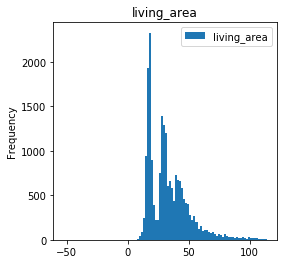

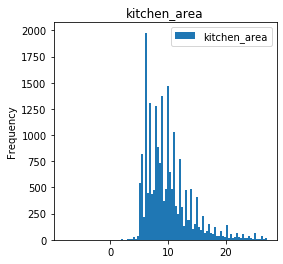

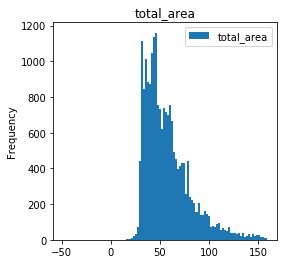

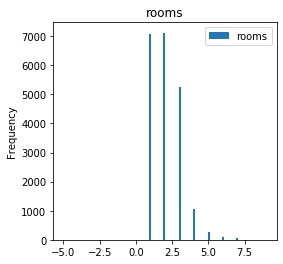

In [81]:
# чтобы не повторять однотипные действия, создадим функцию, котороая будет работать за нас
# чтобы можно было переиспользовать функцию дальше, сделаем отбор по query. Если нужно использовать весь датасет, 
# то сделаем параметр all_dataset. Интервал построениея граффиков будем расчитывать автоматически 

# Расчитаем интервал графиков от Q1-3*IQR до Q3+3*IQR
def plotting_intervals(column):
    
    first_quantile = data[column].quantile(0.25)
    third_quantile = data[column].quantile(0.75)
    iqr = third_quantile - first_quantile
    
    interval_low = first_quantile - 3 * iqr
    interval_high = third_quantile + 3 * iqr
        
    return(interval_low, interval_high)

# напишем функцию, которая строит графики
def plotting(list_of_y,query):
    for element in list_of_y:
        if query == 'all_dataset':
            data.plot(y=element, title = element, bins=100, kind='hist', 
                      figsize=(4,4), range=plotting_intervals(element))
        else:
            data.query(query).plot(y=element, title = element, bins=100, kind='hist',
                                   figsize=(4,4), range=plotting_intervals(element))

# создадим список параметров        
y = ['living_area','kitchen_area','total_area','rooms']

# и пускай "вкалывают роботы, а не человек"
plotting(y,'all_dataset')


Первое что бросается в глаза - это наличие квартир с нулевым числом комнат. Возможно это аппартаменты, студии или еще не построенные квартиры. 
Их сравнительно не много, поэтому можем отбросить такие квартиры, равно как и квартиру с 6 и более комнатами. Из не много, но при этом они могут сильно влиять на среднюю и медианную цену. Проверим это

In [82]:

# средняя цена квартиры по всему датасету
print("средняя цена квартиры по всему датасету:{: .2f}".format(data['last_price'].mean()))

# медианная цена квартиры по всему датасету
print("медианная цена квартиры по всему датасету:{: .2f}".format(data['last_price'].median()))

# средняя стоимость квадратного метра по всему датасету
print("седняя стоимость квадратного метра по всему датасету:{: .2f}".format(data['price_per_squer_meter'].mean()))

# медианная стоимость квадратного метра по всему датасету
print("медианная стоимость квадратного метра по всему датасету:{: .2f}".format(data['price_per_squer_meter'].median()))

# А сколько всего данных 
print("всего в датасете строк:{: .2f}".format(data['last_price'].count()))

print()


# средняя цена квартиры по обрезанному датасету
temp = data.query( ('(rooms >= 1) and (rooms <6)') )['last_price'].mean()
print("средняя цена квартиры по обрезанному датасету:{: .2f}".format(temp))

# медианная цена квартиры по обрезанному датасету
temp = data.query( ('(rooms >= 1) and (rooms <6)') )['last_price'].median()
print("средняя цена квартиры по обрезанному датасету:{: .2f}".format(temp))

# срденяя стоимость квадратного метра по обрезанному датасету
temp = data.query( ('(rooms >= 1) and (rooms <6)') )['price_per_squer_meter'].mean()
print("средняя стоимость квадратного метра по обрезанному датасету:{: .2f}".format(temp))

# медианная стоимость квадратного метра по обрезанному датасету
temp = data.query( ('(rooms >= 1) and (rooms <6)') )['price_per_squer_meter'].median()
print("средняя стоимость квадратного метра по обрезанному датасету:{: .2f}".format(temp))

# А сколько всего данных вобрезанном датасете
temp = data.query( ('(rooms >= 1) and (rooms <6)') )['last_price'].count()
print("Всего в обрезанном датасете строк:{: .2f}".format(temp))


средняя цена квартиры по всему датасету: 6506827.39
медианная цена квартиры по всему датасету: 4700000.00
седняя стоимость квадратного метра по всему датасету: 99203.13
медианная стоимость квадратного метра по всему датасету: 94936.71
всего в датасете строк: 20982.00

средняя цена квартиры по обрезанному датасету: 6258367.46
средняя цена квартиры по обрезанному датасету: 4659205.00
средняя стоимость квадратного метра по обрезанному датасету: 98877.87
средняя стоимость квадратного метра по обрезанному датасету: 94866.73
Всего в обрезанном датасете строк: 20808.00


Посмотрим теперь еще раз на графики площадей и числа комнат, но уже в обрезанном датасете

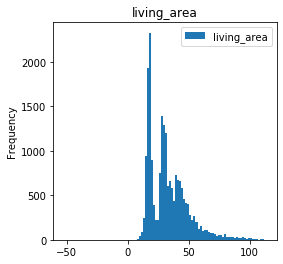

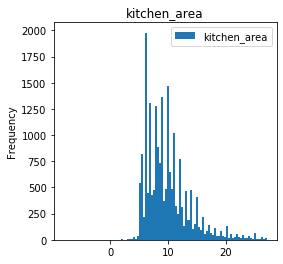

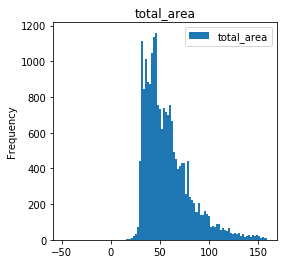

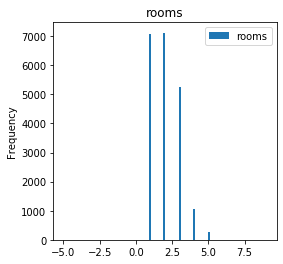

In [83]:
# и по прежнему, пускай вкалывают роботы, а не человек
plotting(y,'(rooms >= 1) and (rooms <6)')



Как видно из графиков, это приблизило нас к Пуассоновскому распределению, а в случае с числом комнат, так и вообще получили. Так же мы увидели, что медиана и среднее не сильно пострадали из-за обрезания данных, поэтому можно оставить эту выборку и пытаться ее улучшить дальше. 
Следующее, что бросается в глаза, это 2 небольших выброса в самом начале графиков общей площади и жилой площади. Попробуем избавиться от них и посмотреть, сильно ли это повлияет на результаты.

<div class="alert alert-danger">
<h2> Комментарий наставника</h2>

При анализе ты проводишь однотипные действия на каждом шаге. Попробуй автоматизировать процесс построения графиков через цикл или собственную функцию. Интервал построения графиков рассчитывай автоматически. Например, от Q1-3\*IQR до Q3+3\*IQR. Число корзин выбери оптимальным для всех графиков.

</div>

<font color=blue> 
 
Исправил. 
Добавил функции отрисовки графииков plotting(x,y) 

где 
x - list из столбцов для которых строится график, 
y - условие отбора строк. Для построения по графиков по срезу необходимо передать условие среза записанное в стиле записи условия для    .query(). Для построения графика по всему датасету - передать строку 'all_dataset'

    
Добавил функции отрисовки графииков расчета интервал построения графиков plotting_intervals(x), где х-имя столбца.

<font color=green> Автоматизация процесса построения графиков сделана. Только отрицательные значения по параметрам следовало бы убрать. -2 комнаты быть не может. Остальное все сделано. Движемся дальше. 
    
---

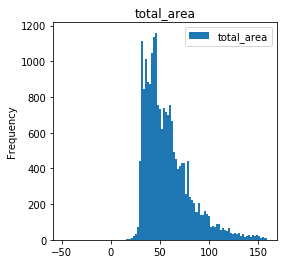

In [84]:
# посмотрим на график total_area более детально

plotting(['total_area'],'(rooms >= 1) and (rooms <6)')

Чтож. Квартиры до 20 квадратных метров это скорее всего не квартиры, а комнаты в коммунальных квартирах, их не так много, поэтому от них тоже можно избавить, а вот квартиры свыше 20 метров вполне могут быть студиями или гостинками, такие уже нельзя игнорировать. Верхнюю границу определим в 200 квадратных метров и посмотрим, сильно ли изменилось наше распределение.

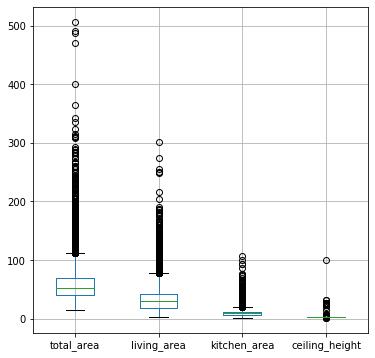

(rooms >= 1) and (rooms <6)and (total_area>=0) and (total_area<158)and (living_area>=0) and (living_area<113)and (kitchen_area>=0) and (kitchen_area<27)and (ceiling_height>=0) and (ceiling_height<3)


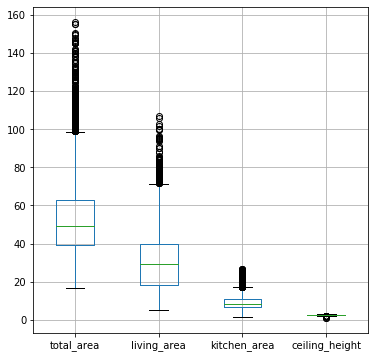

In [85]:
# функия возвращающая верхнюю границу ящика с усами. Используется для того, чтоб удалять все, что является выбросом
# использует функцию plotting_intervals описанную ранее. При этом, поскольку мы знаем, что отрицательных данных
# в датасете нет, то за нижнюю границу возьмем 0

def outlier(columns):
    query = '(rooms >= 1) and (rooms <6)'
    for column in columns:
        query_to_add = 'and ('+column+'>=0) and ('+column+'<'+str(int(plotting_intervals(column)[1]))+')'
        query = query + query_to_add
    return query



def box_plotting(columns, query):
    if query_old == 'all_dataset':
        
        data.boxplot(column = columns, figsize=(6,6))
        plt.show()
    
    else:
        data.query(query).boxplot(column = columns, figsize=(6,6) )
        plt.show()
       



   
        
        
# запишем все интересующие нас параметры        
y = ['total_area','living_area','kitchen_area', 'ceiling_height']

# запишем  query который у нас уже есть
query_old = '(rooms >= 1) and (rooms <6)'

# построим ящики с усами для всех интересующих нас параметров с учетом имеющегося query
box_plotting(y, query_old)




# выделим верхнии границы интервала и построим графики без выбросов
query_new = outlier(y)
print(query_new)
box_plotting(y, query_new)



<div class="alert alert-danger">
<h2> Комментарий наставника</h2>

Процесс стоит автоматизировать. По сути ты пытаешься избавиться от выбросов. Выбросы из данных следует удалять на основании диаграмм размаха. Построй для всех необходимых параметров график boxplot. По нему найди границы нормальных значения и удали выбросы. 

</div>

<font color=blue> 
Исправил. 
Добавил функции отрисовки графииков box_plotting(x,y) 
где 
x - list из столбцов для которых строится график, 
y - условие отбора строк. Для построения по графиков по срезу необходимо передать условие среза записанное в стиле записи условия для    .query(). Для построения графика по всему датасету - передать строку 'all_dataset'

    
Добавил функцию, которая определяет верхнюю границу нормальных данных, и формирует query для дальнейшено использования (outlier(х) где х-имя столбца), функция использует описанную ранее функцию plotting_intervals(x).

<font color=green> Выбросы из данных удалены. Здорово, что и этот процесс автоматизирован. 
    
---

Как видно, мы не сильно изменили наше распределение, при этом избавились от выбросов, поэтому оставляем изменения. Теперь мы готовы окончательно собрать наш новый датасет, с которым будем работать дальше.


In [86]:
good_data = data.query(query_new)
# посмотрим на корреляцию
good_data.corr()

,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,city_centers_nearest,days_exposition,first_exposition_year,first_exposition_month,first_exposition_day_of_week,price_per_squer_meter,share_of_living_area,share_of_kitchen_area
last_price,1.000000,0.727680,0.433684,0.381011,0.309799,0.602271,0.212987,0.535872,0.109569,-0.268275,0.042400,0.025580,0.003126,-0.021630,0.663525,0.019810,-0.140198
total_area,0.727680,1.000000,0.794080,0.270362,0.121062,0.923204,0.070815,0.505499,0.133919,-0.103146,0.117136,-0.068727,0.017938,-0.016360,0.043235,0.261829,-0.437660
rooms,0.433684,0.794080,1.000000,-0.026838,-0.148576,0.897007,-0.119617,0.076431,0.052716,-0.045751,0.096307,-0.032993,0.007849,-0.000531,-0.166728,0.628769,-0.697009
ceiling_height,0.381011,0.270362,-0.026838,1.000000,0.374832,0.116444,0.241005,0.480811,0.118183,-0.163878,0.041355,-0.072879,0.000367,-0.007395,0.314537,-0.295601,0.254153
floors_total,0.309799,0.121062,-0.148576,0.374832,1.000000,-0.053867,0.658786,0.447605,0.180794,-0.138728,-0.037426,-0.019351,0.013839,-0.006257,0.402929,-0.415243,0.371997
living_area,0.602271,0.923204,0.897007,0.116444,-0.053867,1.000000,-0.053011,0.240181,0.079669,-0.081099,0.108091,-0.049572,0.007952,-0.008594,-0.064662,0.595454,-0.632186
floor,0.212987,0.070815,-0.119617,0.241005,0.658786,-0.053011,1.000000,0.300583,0.181713,-0.086796,-0.020299,-0.015927,0.018692,0.004146,0.282377,-0.298533,0.262608
kitchen_area,0.535872,0.505499,0.076431,0.480811,0.447605,0.240181,0.300583,1.000000,0.146280,-0.120998,0.051608,-0.064980,0.021950,-0.030859,0.290227,-0.446363,0.510822
balcony,0.109569,0.133919,0.052716,0.118183,0.180794,0.079669,0.181713,0.146280,1.000000,0.002866,-0.040461,-0.018159,-0.016772,-0.012350,0.036744,-0.077826,0.021427
city_centers_nearest,-0.268275,-0.103146,-0.045751,-0.163878,-0.138728,-0.081099,-0.086796,-0.120998,0.002866,1.000000,0.003952,-0.012896,-0.033406,0.012404,-0.385237,0.022261,-0.038437


### Вывод:
Цена недвижимости сильнее всего зависит от общей площади квартиры, чуть меньше - от жилой площади. Зависимость цены и площади кухни есть, но не очень сильная, далее идут зависимости цены от высоты числа комнат и высоты потолка. При этом, при уменьшении доли площади кухни в общей площади квартиры - цена даже немного растет.

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Значения корреляций приведены. Только нам стоит рассматривать не цену квартир, а цену за кв. метр. Именно он нас и интересует. Также для визуализации данной матрицы корреляций можно использовать метод heatmap из библиотеки seaborn. Будет здорово, если ты сможешь это реализовать. 

</div>

### Изучим время продажи квартиры. 
Построим гистограмму. Посчитаем среднее и медиану. Опишем, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"

Среднее число дней за которое продается квартира: 179.03
Медианное число дней за которое продается квартира: 98.00


(0, 800)

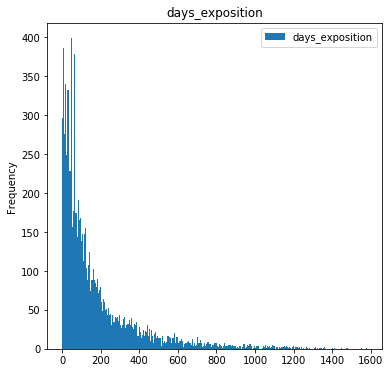

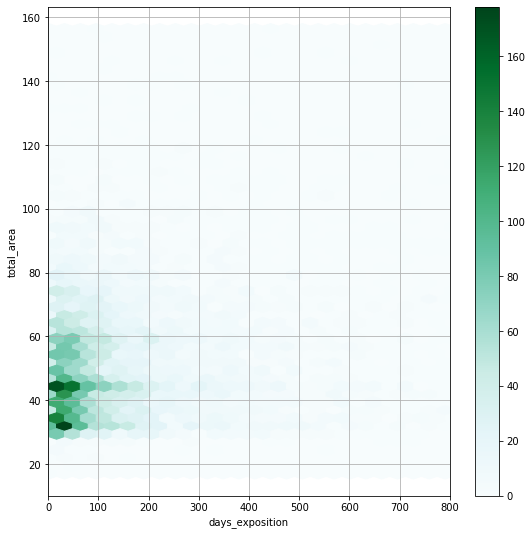

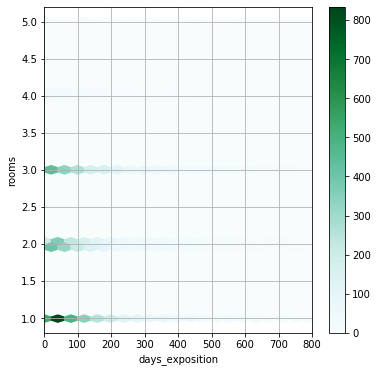

In [87]:
good_data.plot(y='days_exposition', title = 'days_exposition', bins=300, kind='hist', figsize=(6,6))

print('Среднее число дней за которое продается квартира:{: .2f}'.format(good_data['days_exposition'].mean()))
print('Медианное число дней за которое продается квартира:{: .2f}'.format(good_data['days_exposition'].median()))


good_data.plot(x='days_exposition', y='total_area', kind='hexbin', gridsize=50, figsize=(9, 9), sharex=False, grid=True)
plt.xlim(0,800)

good_data.plot(x='days_exposition', y='rooms', kind='hexbin', gridsize=40, figsize=(6, 6), sharex=False, grid=True)
plt.xlim(0,800)


### Вывод
Обычно продажа занимает не более 104 дней, но в отдельных случаях может и затянуться. Можно считать, что квартира продалась быстро, если с момента размещения объявления до момента снятия объявления прошло не более 25 дней. Чаще всего, быстро продаются однушки, реже двушки, общей площадью до 50 квадратных метров. В целом, если квартира до 70 квадратных метров, то шанс продать ее в первые 25 дней достаточно велик. Если продажа квартиры затянулась дольше чем на 104 дней, то можно считать это необычайно длинной продажей.

<div class="alert alert-success">
<h2> Комментарий наставника</h2>
   
Здорово, что есть гипотезы о быстрых и долгих сделках.

</div>

### Изучим, какие факторы больше всего влияют на стоимость квартиры
Узнаем, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года." 

In [88]:
# скопируем нужные нам столбцы в новый фрейм данных
df_for_last_price_research = good_data.loc[:,['last_price','rooms','total_area','share_of_living_area','share_of_kitchen_area',
                 'city_centers_nearest','floor_group','first_exposition_year','first_exposition_month',
                 'first_exposition_day_of_week', 'locality_name_group']].copy()

# построим матрицу корреляции
df_for_last_price_research.corr()


,last_price,rooms,total_area,share_of_living_area,share_of_kitchen_area,city_centers_nearest,first_exposition_year,first_exposition_month,first_exposition_day_of_week
last_price,1.000000,0.433684,0.727680,0.019810,-0.140198,-0.268275,0.025580,0.003126,-0.021630
rooms,0.433684,1.000000,0.794080,0.628769,-0.697009,-0.045751,-0.032993,0.007849,-0.000531
total_area,0.727680,0.794080,1.000000,0.261829,-0.437660,-0.103146,-0.068727,0.017938,-0.016360
share_of_living_area,0.019810,0.628769,0.261829,1.000000,-0.747388,0.022261,0.024171,-0.017060,0.011913
share_of_kitchen_area,-0.140198,-0.697009,-0.437660,-0.747388,1.000000,-0.038437,-0.004374,0.007833,-0.015422
city_centers_nearest,-0.268275,-0.045751,-0.103146,0.022261,-0.038437,1.000000,-0.012896,-0.033406,0.012404
first_exposition_year,0.025580,-0.032993,-0.068727,0.024171,-0.004374,-0.012896,1.000000,-0.294386,-0.002471
first_exposition_month,0.003126,0.007849,0.017938,-0.017060,0.007833,-0.033406,-0.294386,1.000000,-0.008461
first_exposition_day_of_week,-0.021630,-0.000531,-0.016360,0.011913,-0.015422,0.012404,-0.002471,-0.008461,1.000000


Как видно из матрицы корреляции, цена продажи достаточно сильно однонаправленно зависит от общей площади квартиры, а так же есть зависимость от количества комнат. При этом есть и обратная зависимость от расстояния до центра и доли площади кухни от общей площади квартиры.
Пока все выглядит логично: 
- при увеличении расстояния до центра - цена падает;
- при увеличении количества комнат - цена растет;
- при увеличении общей площади квартиры - цена растет;
- при увеличении доли кухни в общей площади квартиры - цена падает. Кому нужна квартира с огромной кухней и крохотными комнатками?!

Но в получившейся корреляционной матрице нет важного фактора: расположения квартиры (первый этаж, последний этаж или другой). Это потому, что эти данные хранятся в виде текста. Посмотрим, как цена квартиры зависит от расположения.

In [89]:
# добавим числовое выражение для floor_group
df_for_last_price_research.loc[df_for_last_price_research['floor_group'] == 'Первый', 'floor_group_number'] = 1
df_for_last_price_research.loc[df_for_last_price_research['floor_group'] == 'Другой', 'floor_group_number'] = 2
df_for_last_price_research.loc[df_for_last_price_research['floor_group'] == 'Последний', 'floor_group_number'] = 3

# посмотрим, как last_price зависит от floor_group

df_for_last_price_research['last_price'].corr(df_for_last_price_research['floor_group_number'])

0.030488025923291234

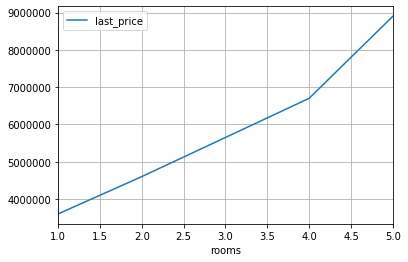

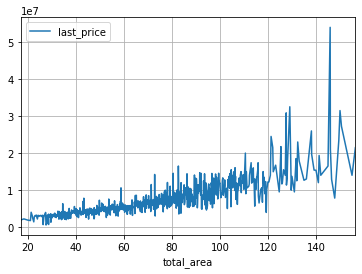

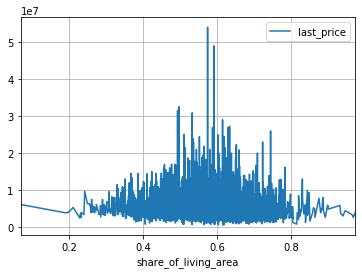

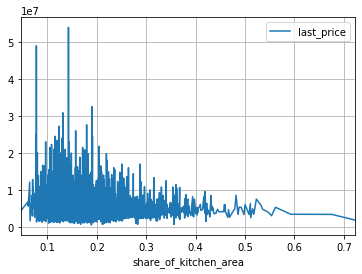

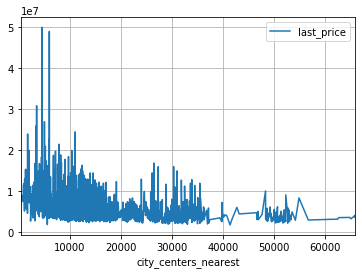

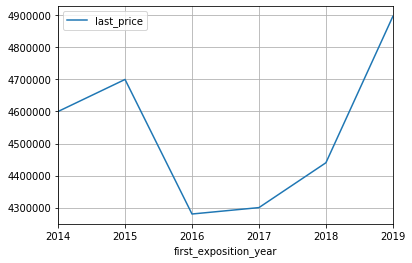

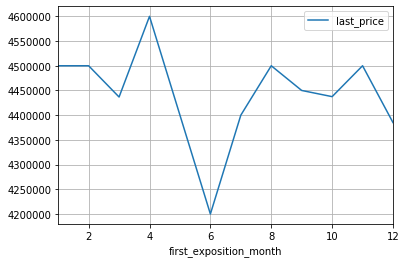

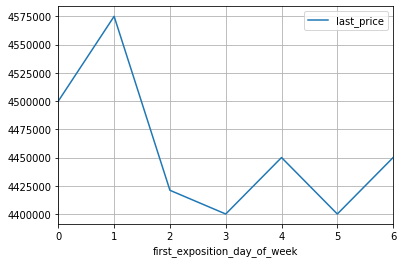

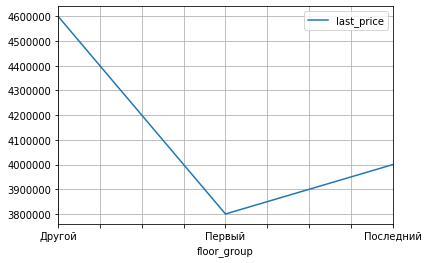

In [90]:
# построим графики зависимсотси цены

y = ['rooms', 'total_area', 'share_of_living_area', 'share_of_kitchen_area', 'city_centers_nearest',
    'first_exposition_year','first_exposition_month','first_exposition_day_of_week','floor_group']

for element in y:
    df_for_last_price_research.pivot_table(index=element, 
                                       values='last_price', aggfunc='median').plot(grid=True)

  

Теперь видем, что не у всех параметров зависимость линейна и можем уточнить наши выводы:
- при увеличении расстояния до центра - цена падает, при этом на расстоянии от 20 до 30 киллометров цена на жилье ниже чем на расстоянии от 30 до 35 километров от центра.
- при увеличении общей площади квартиры - цена растет, в среднем кватриры от 120 до 160 квадратных метров продаются дороже других
- при увеличении доли кухни в общей площади квартиры - цена падает. Оптимально, если кухня не превышает 20% от общей площади квартиры
- дешевле всего квартиры продавали в 2017 году, а в 2019 цены вернулись на уровень середины 2015 года
- лучший месяц для покупки квартиры - июнь, средняя цена квартиры размещенной на продажу в этом месяце - на 200 тысяч ниже. Худший - апрель
- дорогие квартиры обычно выставляяются на продажу во вторник, а самые дешевые в воскресенье

### Вывод
Такио образом, из рассмотренных параметров, на стоимость квартиры достаточное влияние оказывают: 
- общая площадь квартиры
- количество комнат
- расстояние до центраа 
- доля площади кухни в общей площади квартиры. 

Первые два фактора влияют однонаправленно, то есть с их ростом следует ожидать рост стоимости, а вот последние два - разнонаправленно и при их росте цена должна снижаться. При этом, стоит помнить, что доля площади кухни от общей площади квартиры является производным значением, от общей площади квартиры и площади кухни, а это значит, что при прочих равных, квартира с большей кухней, скорее всего будет стоить дешевле.

**Так же можем дать несколько советов для тех кто хочет купить квартиру по минимальной цене.**
Квартира должна:
распологаться в 20-30 киллометрах от центра города; быть до 80 квадратных метров по площади, с площадью кухни более 20% от общей площади квартиры; выставлена на продажу в воскресный июньский день... в 2017 году.

<div class="alert alert-danger">
<h2> Комментарий наставника</h2>

Помимо корреляций надо также построить и графики зависимости цены от данных в задании параметров. Зависимость может быть нелинейной, корреляция же этого не покажет. 

</div>

<font color=blue>
Добавил графики, уточнил выводы

<font color=orange>Графики появились. Долю кухни и жилого пространства стоило построить поточечно. Линейный график не очень хорошо себя показывает в данном случае. 
    
---

### Узнаем населенные пункты с наибольшим числом объявлений
Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

In [91]:
# сгруппируем данные в good_data по населенным пунктам.
# Поскольку населенные пункты в locality_name у нас не явно дублируются, будем использовать столбец locality_name_group

df_for_locality_research = good_data.pivot_table(index='locality_name_group', 
                      values=['last_price','price_per_squer_meter'], aggfunc=['median','count'])

# переименуем столбцы
df_for_locality_research.columns = ['median_last_price','median_ppm', 'quantity_last_price','quantity_ppm' ]

# Выведем первые 10 населенных пунктов с наибольшим числом объявлений и узнаем среднюю цену квадратного метра в них
df_for_locality_research.sort_values('quantity_ppm', ascending=False, inplace=True)
df_for_locality_research.head(10)

,median_last_price,median_ppm,quantity_last_price,quantity_ppm
locality_name_group,,,,
Санкт-Петербург,5047000,102272.730,7087,7087
Всеволожск,3500000,65511.110,237,237
Шушары,4050000,77744.815,200,200
Мурино,3750000,85714.290,195,195
Пушкин,4895000,98536.695,178,178
Колпино,3600000,74729.185,174,174
Кудрово,4089000,96560.225,164,164
Парголово,4183500,91378.490,130,130
Петергоф,3595000,81823.145,124,124


Получается что первая десятка выглядит так:
- 1) Санкт-Петербург, со средней стоимостью квадратного метра 103 794 рубля
- 2) Всеволожск, со средней стоимостью квадратного метра 65 649 рублей
- 3) Пушкин, со средней стоимостью квадратного метра 98 537 рублей
- 4) Шушары, со средней стоимостью квадратного метра 77 745 рублей
- 5) Мурино, со средней стоимостью квадратного метра 85 714 рублей
- 6) Колпино, со средней стоимостью квадратного метра 74 375 рублей
- 7) Кудрово, со средней стоимостью квадратного метра 96 910 рублей
- 8) Петергоф, со средней стоимостью квадратного метра 81 994 рублея
- 9) Гатчина, со средней стоимостью квадратного метра 68 140 рублей
- 10) Парголово, со средней стоимостью квадратного метра 91 378 рублей

Выделим населенные пункты с самой высокой и низкой стоимостью жилья

In [92]:
# соберем сводную таблицу из максимальных и минимальных цен по населенным пунктам
price_per_locality = good_data.pivot_table(index='locality_name_group', values='last_price', 
                                           aggfunc=['max','min', 'median'] )

# переименуем колонки, чтоб по ним можно было спокойно сортировать
price_per_locality.columns=['max_price','min_price','median_price']

# отсортируем по убыванию максимальной цены
print(price_per_locality.sort_values(by='max_price', ascending=False).head(1), end='\n\n')

# отсортируем по убыванию минимальной цены
print(price_per_locality.sort_values(by='min_price', ascending=False).tail(1), end='\n\n')

# отсортируем по убыванию медианной цены
print(price_per_locality.sort_values(by='median_price', ascending=False))

                     max_price  min_price  median_price
locality_name_group                                    
Санкт-Петербург       54000000    1200000       5047000

                     max_price  min_price  median_price
locality_name_group                                    
Сланцы                 2000000     490000        780000

                     max_price  min_price  median_price
locality_name_group                                    
Сестрорецк            16730000    3000000       5200000
Санкт-Петербург       54000000    1200000       5047000
Пушкин                16912000    2200000       4895000
Кузьмолово             5950000    1950000       4500000
Репино                 4500000    4500000       4500000
...                        ...        ...           ...
Коркино                 700000     700000        700000
Никольский              700000     700000        700000
Пикалёво               1900000     560000        650000
Фалилеево               600000     600000     

Таким образом, населенный пункт с максимально дорогой квартирой это Санкт-Петербург и квартира за 83 миллиона 820 тысяч. 
Населенным пунктом с самым дешевым жильем стал Сланцы за 490 тысяч.

Если посмотрим на медианную цену жилья, то окажется, что самым дорогим населенным пунктом является Александровская, где стоимость жилья в 2.5 раза выше чем в Питере (13 миллионов 700 тысяч против 5 миллионов 400 тысяч), а самым дешевым жильем может похвастаться Совхозный, где средняя стоимость всего 565 тысяч. Однако, стоит учитывать, что в обоих населенных пунктах на продаже было всего по 1 объекту.
Попробуем узнать максимальную и минимальную цену жилья в каждом из населенных пунктов входящих в топ-10 по количеству объявлений.

In [93]:
# объеденим два среза данных, чтоб у нас были необходимые нам данные о количестве объявлений и медианной цене
df_for_locality_research =df_for_locality_research.join(price_per_locality)                 

# сделаем срез только топ-10 населенных пунктов по количеству объявлений
median_price_in_top_ten = (df_for_locality_research.sort_values(by=['quantity_last_price'], ascending=False).head(10))

# отсортируем полученный срез по убыванию медианной цены
print(median_price_in_top_ten.sort_values(by='max_price', ascending=False).head(1))

print(median_price_in_top_ten.sort_values(by='min_price', ascending=True).head(1))

                     median_last_price  median_ppm  quantity_last_price  \
locality_name_group                                                       
Санкт-Петербург                5047000   102272.73                 7087   

                     quantity_ppm  max_price  min_price  median_price  
locality_name_group                                                    
Санкт-Петербург              7087   54000000    1200000       5047000  
                     median_last_price  median_ppm  quantity_last_price  \
locality_name_group                                                       
Гатчина                        3100000    67944.25                  121   

                     quantity_ppm  max_price  min_price  median_price  
locality_name_group                                                    
Гатчина                       121   13900000    1050000       3100000  


Получается, что самым дорогим населенным пунктом, с учетом количества объявлений, является Санкт-Петербург все с той же медианной стоимостью в 5 миллионов 400 тысяч и максимальной ценой в 83 миллиона 820 тысяч, а самым дешевым, из тех что входят в топ-10 - Гатчина с медианной стоимостью 3 миллиона 250 тысяч и минимальной ценой в 1 миллион 50 тысяч, и это не смотря на то, что во Всеволожске медианная стоимость квадратного метра ниже чем в Гатчине, что означает, что в Всеволожске жилища в среднем больше по площади, чем в Гатчине 

### Вывод:
Топ-10 населенных пунктов по числу объявлений выглядит следующим образом:
- 1) Санкт-Петербург, со средней стоимостью квадратного метра 103 794 рубля
- 2) Всеволожск, со средней стоимостью квадратного метра 65 649 рублей
- 3) Пушкин, со средней стоимостью квадратного метра 98 537 рублей
- 4) Шушары, со средней стоимостью квадратного метра 77 745 рублей
- 5) Мурино, со средней стоимостью квадратного метра 85 714 рублей
- 6) Колпино, со средней стоимостью квадратного метра 74 375 рублей
- 7) Кудрово, со средней стоимостью квадратного метра 96 910 рублей
- 8) Петергоф, со средней стоимостью квадратного метра 81 994 рублея
- 9) Гатчина, со средней стоимостью квадратного метра 68 140 рублей
- 10) Парголово, со средней стоимостью квадратного метра 91 378 рублей

Населенный пункт с максимально дорогой квартирой это Санкт-Петербург и квартира за 83 миллиона 820 тысяч. 

Населенным пунктом с самым дешевым жильем стал Сланцы за 490 тысяч.

По медианной цене, самым дорогим населенным пунктом является Александровская, а самым дешевым жильем может похвастаться Совхозный, но в каждом из этих населенных пунктов было всего по 1 объявлению.

Среди Топ-10 населенных пунктов по числу объявлений, максимальную стоимость за жилье просили в Санкт-Петербурге, а минимальную в Гатчине. При этом в Гатчине средняя стоимость квадратного метра выше чем в Всеволожске, а значит площадь объектов в последнем в среднем больше чем в Гатчине

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

Анализ цен в зависимости от населенного пункта сделан. Можно привести график зависимости цены от местоположения. Таблицу в выводы лучше не переносить руками, не стоит тратить на это время. 

</div>

### Изучим предложения квартир в Санкт-Петербурге.
Для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге и выясним, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона

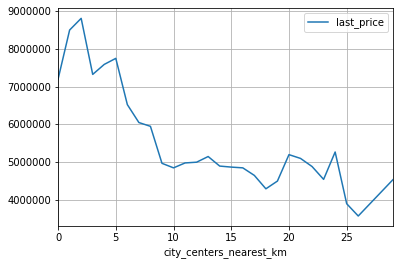

In [94]:
# сделаем срез из нужных нам для задачи данных
spb_data = good_data.query('locality_name_group == "Санкт-Петербург"').loc[:,['last_price','total_area','city_centers_nearest']].copy()

# посчитаем расстояние до центра в километрах и сразу округлим до целых значений
spb_data['city_centers_nearest_km'] = (spb_data['city_centers_nearest']/1000).round(0)

# рассчитаем медианную цену для каждого километра и построим график
spb_data_pivot = spb_data.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='median').plot(grid=True)





### Вывод
Можно считать, что расстояние до 10 киллометров од вдорцовой площади является центральной областью Санкт-Петербурга, при выходе из этой области средняя цена за квартиру стабилизируется и график уходит в боковик.

<div class="alert alert-success">
<h2> Комментарий наставника</h2>

Да, именно эту границу мы можем назвать границей центральной части области. 

</div>

### Выделим сегмент квартир в центре. 
Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 
Посмотрим, отличаются ли выводы от общих выводов по всему городу?".


In [95]:
# создадим срез со всеми данными которые имеются по Питеру
temp = good_data.query(
    'locality_name_group == "Санкт-Петербург"').copy()

# добавим в срез столбец с расстоянием в километрах
temp['city_centers_nearest_km'] = (temp['city_centers_nearest']/1000).round(0)

# сохраним срез под вменяемым именем, и только необходимые данные
spb_data_2 = temp.loc[:,
        ['price_per_squer_meter','total_area','rooms','ceiling_height', 'first_day_exposition',
        'floors_total','living_area','floor','floors_total','kitchen_area','city_centers_nearest_km','city_centers_nearest']]

# посмотрим на зависимость цены от обозначенных параметров 
print('в целом по Питеру \n',spb_data_2.corr().loc[:,['price_per_squer_meter']]) 

# посмотрим на зависимость цены от обозначенных параметров в "центральном" районе Санкт-Петербурга
print('\nв центральном районей Питера\n',spb_data_2.query('city_centers_nearest_km < 10').corr().loc[:,['price_per_squer_meter']]) 

в целом по Питеру 
                          price_per_squer_meter
price_per_squer_meter                 1.000000
total_area                            0.018086
rooms                                -0.240618
ceiling_height                        0.327214
floors_total                          0.273214
living_area                          -0.109107
floor                                 0.211487
floors_total                          0.273214
kitchen_area                          0.312140
city_centers_nearest_km              -0.316022
city_centers_nearest                 -0.315157

в центральном районей Питера
                          price_per_squer_meter
price_per_squer_meter                 1.000000
total_area                            0.030283
rooms                                -0.180850
ceiling_height                        0.187363
floors_total                          0.191998
living_area                          -0.074419
floor                                 0.156599
floors_to

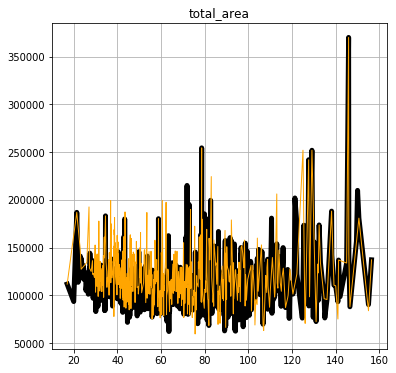

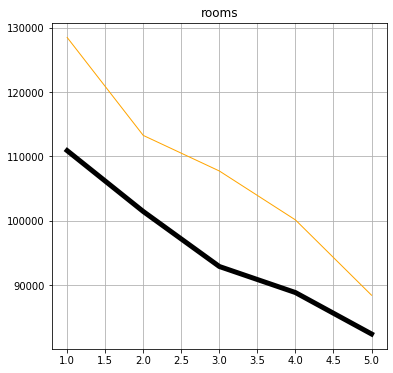

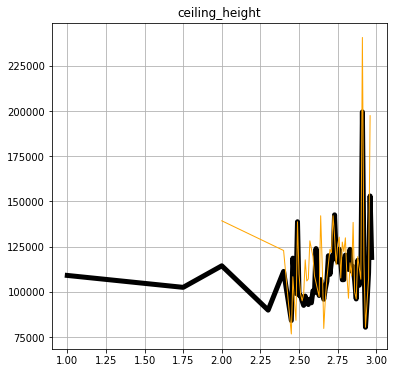

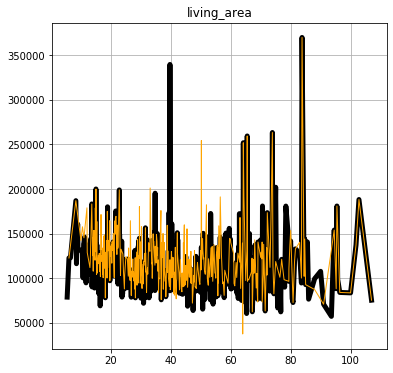

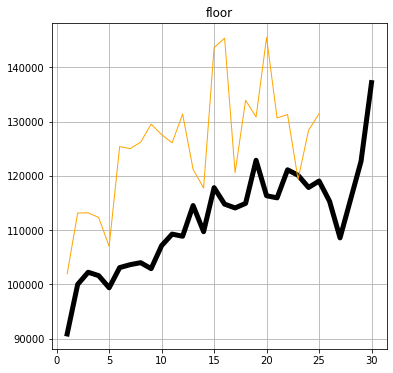

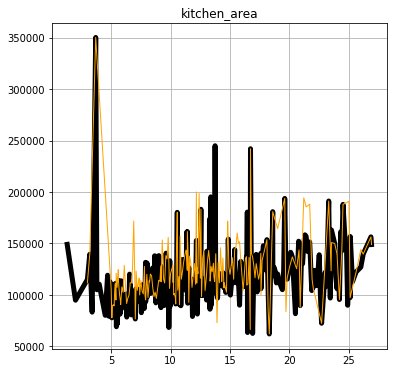

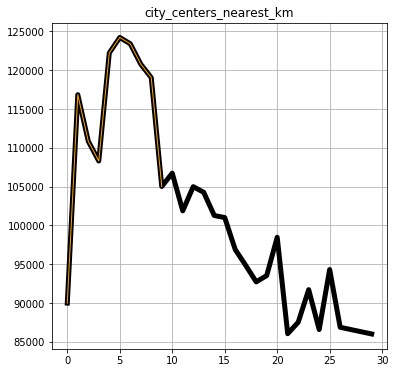

In [96]:
y=['total_area','rooms','ceiling_height','living_area',
   'floor','kitchen_area','city_centers_nearest_km']


for element in y:
    plt.title(element)
    plt.xlable = element
    plt.ylable = 'price_per_squer_meter'


    plt.plot(spb_data_2.pivot_table(index=element, values='price_per_squer_meter', 
                                                                 aggfunc='median'), color='black',
                                                                 linewidth = 5)

    
    plt.plot(spb_data_2.query('city_centers_nearest_km < 10').pivot_table(index=element, 
                                                                 values='price_per_squer_meter', 
                                                                 aggfunc='median'), color='orange', linewidth = 1)
    plt.gcf().set_size_inches(6, 6)
    plt.grid()  
    plt.show()

   

        
        
        
        

#### Выводы
В целом по Санкт-Петербургу влияние различных факторов на цену жилья схоже с картиной по всему датасету: 
цена недвижимости сильнее всего зависит от общей площади квартиры, чуть меньше - от жилой площади. Зависимость цены и площади кухни есть, но не сильная, примерно такая же как и зависимость цены от высоты потолка или числа комнат.

Для "центрального" района Питера так  же характерна достаточно сильная однонаправленная зависть цены от общей и жилой площади квартиры, но в случае с "центральным" районом Питера следует отметить, что по сравнению со всем городом, все однонаправленные зависимости слабее. Таким образом, можно говорить, что для покупателей недвижимости в этом районе фактор "близость расположения к центру города" имеет большее значение. Так же стоит отметить, что такой параметр как "расстояние до центра", в радиусе 10 километров от этого самого центра имеет в 2 раза более слабый эффект на цену, аналогичная ситуация и с высотой потолков. А вот этаж, на котором продается квартира в "центральном" районе начинает влиять в 3 раза сильнее, влияние количество этажей в доме и вовсе возрастает в 8 раз, но влияние последних двух параметров даже с учетом таких ростов все равно остается достаточно низким.

<div class="alert alert-danger">
<h2> Комментарий наставника</h2>

Опять же, помимо корреляций, нам нужны графики зависимости цены от параметров. Также надо рассматривать влияние параметров на цену кв. метра, а не полную цену. 
    
Будет здорово, если ты построишь параметры для центра и для остальной части города на одном рисунке. Так различия в данных будет легче обнаружить. 

</div>

<font color=blue>
Добавил графики, уточнил выводы

<font color=orange>Не все графики хорошо интерпретируемы. Однако характерные черты центральной части города отметить можно. 
    
---

### Шаг 5. Общий вывод

Чем глубще погружаешься в данные, тем больше интересного можно найти.

На стоимость жилья может влиять множество факторов и важно анализировать не только агломерацию в целом, но и делать срезы и смотреть, какие факторы важны в каждом конкретном населенном пункте. Также имеет смысл сравнивать вклад одинаковых факторов в формирование цен между различными населенными пунктами. Крупные города так же следует делить на районы и проводить анализ не только в целом по городуу, но и по каждому району в отдельности.

**В общей картине**

На стоимость квартиры достаточное влияние оказывают: 
- общая площадь квартиры
- количество комнат
- расстояние до центраа 
- доля площади кухни в общей площади квартиры. 
Первые два фактора влияют однонаправленно, то есть с их ростом следует ожидать рост стоимости, а вот последние два - разнонаправленно и при их росте цена должна снижаться. При этом, стоит помнить, что доля площади кухни от общей площади квартиры является производным значением, от общей площади квартиры и площади кухни, а это значит, что при прочих равных, квартира с большей кухней, скорее всего будет стоить дешевле.
Продажа обычно занимает не более 104 дней, но в отдельных случаях может и затянуться. Можно считать, что квартира продалась быстро, если с момента размещения объявления до момента снятия объявления прошло не более 25 дней. Чаще всего, быстро продаются однушки, реже двушки, общей площадью до 50 квадратных метров. В целом, если квартира до 70 квадратных метров, то шанс продать ее в первые 25 дней достаточно велик. Если продажа квартиры затянулась дольше чем на 104 дней, то можно считать это необычайно длинной продажей.

Топ-10 населенных пунктов по числу объявлений выглядит следующим образом:
1) Санкт-Петербург
2) Всеволожск
3) Пушкин
4) Шушары
5) Мурино
6) Колпино
7) Кудрово
8) Петергоф
9) Гатчина
10) Парголово
Среди Топ-10 населенных пунктов по числу объявлений, максимальную стоимость за жилье просили в Санкт-Петербурге, а минимальную в Гатчине. При этом в Гатчине средняя стоимость квадратного метра выше чем в Всеволожске, а значит площадь объектов в последнем в среднем больше чем в Гатчине

Населенный пункт с максимально дорогой квартирой это Санкт-Петербург и квартира за 83 миллиона 820 тысяч.
Населенным пунктом с самым дешевым жильем стал Сланцы за 490 тысяч.
По медианной цене, самым дорогим населенным пунктом является Александровская, а самым дешевым жильем может похвастаться Совхозный, но в каждом из этих населенных пунктов было всего по 1 объявлению.

**Картина по Санкт-Петербургу**

В целом по Санкт-Петербургу влияние различных факторов на цену жилья схоже с картиной по всему датасету: цена недвижимости сильнее всего зависит от общей площади квартиры, чуть меньше - от жилой площади. Зависимость цены и площади кухни есть, но не сильная, примерно такая же как и зависимость цены от высоты потолка или числа комнат.
Для "центрального" района Питера (района, который входит в радиус 10 километров от дворцовой площади) так же характерна достаточно сильная однонаправленная зависть цены от общей и жилой площади квартиры, но в случае с "центральным" районом следует отметить, что по сравнению со всем городом, все однонаправленные зависимости слабее. Таким образом, можно говорить, что для покупателей недвижимости в этом районе фактор "близость расположения к центру города" имеет большее значение. Так же стоит отметить, что такой параметр как "расстояние до центра", в радиусе 10 километров от этого самого центра имеет в 2 раза более слабый эффект на цену, аналогичная ситуация и с высотой потолков. А вот этаж, на котором продается квартира в "центральном" районе начинает влиять в 3 раза сильнее, влияние количество этажей в доме и вовсе возрастает в 8 раз, но влияние последних двух параметров даже с учетом таких ростов все равно остается достаточно низким.

<div class="alert alert-danger">
<h2> Комментарий наставника</h2>

Финальный вывод и есть главный результат твоей работы. Стоит писать его подробно по результатам проведенной работы. В нем можно приводить полученные в ходе работы значения. Также можно расписать все, что было сделано в работе.

</div>

<font color=blue>
Дополнил выводы, без расписания всего что делал в работе. Ведь топ-менеджерам не интересно как я сделал, им нужна выжимка и результаты работы. Если им будет интересно "как", то они посмотрят jupyter, как раз для этого в пишу текст в тетрадке, который описывает весь ход работы и делаю подробные комментарии в коде.

<font color=green> Выводы стали подробнее. Да, суть выводов - именно в полученных в работе результатах. В учебных целях можно и описать то, что было сделано. Здорово, что приведены ответы на главные вопросы проекта. 
    
---

<div class="alert alert-warning">
<h2> Комментарий наставника</h2>

- Попробуй улучшить обработку пропусков;
- Автоматизируй процесс построения графиков;
- Выбросы удаляй на основании boxplot;
- Приведи графики зависимости цены за кв. метр от параметров квартиры как для всех данных, так и для центральной части города;
- Финальный вывод стоит делать по результатам проведенной работы.

Если тебе нравится тема визуализации, то можешь изучить методы библиотеки seaborn. Она позволяет строить довольно презентабельные графики.

Ты выполнил все пункты работы, молодец! Теперь осталось исправь отмеченные тут замечания, и тогда получится очень достойная работа :)

</div>

<font color=blue>
Провел исправления. Под каждым крассным комментарием добавил синий, которой объясняет, какие изменения были проведены

<font color=green> Основные помарки исправлены, и теперь работа выполнена хорошо. Успехов в дальнейших проектах :)
    
---

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. 
- [x]  Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод